#### **Up-sample Minority Class**

Up-sampling is the process of randomly duplicating observations from the minority class in order to reinforce its signal. <br>

I am resampling the minority class with replacement, setting the number of samples to match that of the majority class.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
from sklearn.utils import resample

In [3]:
df = pd.read_csv("haberman.data", low_memory=False, names=["Age", "Operation_Year", "Pos_Aux_Nodes", "Survival_Status"])
df.head()

,Age,Operation_Year,Pos_Aux_Nodes,Survival_Status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [4]:
df["Survival_Status"].value_counts()

1    225
2     81
Name: Survival_Status, dtype: int64

<AxesSubplot:xlabel='Survival_Status', ylabel='count'>

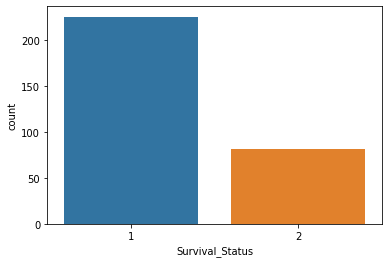

In [5]:
sns.countplot(data=df, x="Survival_Status")

In [6]:
df_majority = df[df.Survival_Status == 1]
df_minority = df[df.Survival_Status == 2]

In [7]:
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                replace=True,     # sample with replacement
                                n_samples=225, 
                                random_state=123)

In [8]:
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
df_upsampled.Survival_Status.value_counts()

2    225
1    225
Name: Survival_Status, dtype: int64

In [9]:
X = df_upsampled.drop("Survival_Status", axis=1)
y = df_upsampled["Survival_Status"]

X_train, X_OTHER, y_train, y_OTHER = train_test_split(X, y, test_size=0.2, random_state=1)
X_eval, X_test, y_eval, y_test = train_test_split(X_OTHER, y_OTHER, test_size=0.5, random_state=1)

scaler = StandardScaler()

scaled_X_train = scaler.fit_transform(X_train)
scaled_X_eval = scaler.transform(X_eval)
scaled_X_test = scaler.transform(X_test)

<AxesSubplot:xlabel='Age', ylabel='Pos_Aux_Nodes'>

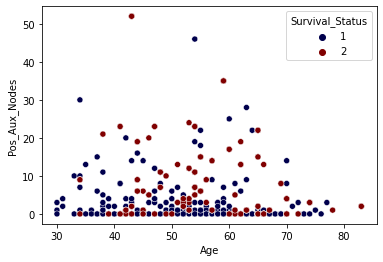

In [10]:
sns.scatterplot(x="Age", y="Pos_Aux_Nodes", hue="Survival_Status", data=df_upsampled, palette="seismic")

In [11]:
svm = SVC()
param_grid = {"C": [0.5, 1, 1.1, 2, 2.5, 10], "kernel" : ["linear", "rbf", "sigmoid"], "gamma": ["scale", "auto", 0.1, 0.2, 0.5, 1]}
grid = GridSearchCV(svm,param_grid)
grid.fit(scaled_X_train, y_train)
grid.best_params_

{'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}

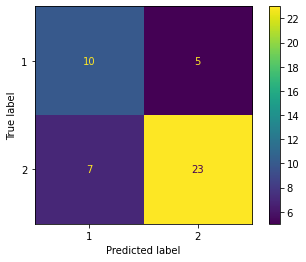

In [12]:
y_pred = grid.predict(scaled_X_eval)
plot_confusion_matrix(grid, scaled_X_eval, y_eval)

In [13]:
print(classification_report(y_eval, y_pred))

              precision    recall  f1-score   support

           1       0.59      0.67      0.62        15
           2       0.82      0.77      0.79        30

    accuracy                           0.73        45
   macro avg       0.70      0.72      0.71        45
weighted avg       0.74      0.73      0.74        45



In [14]:
print(precision_score(y_eval, y_pred))
print(recall_score(y_eval, y_pred))
print(f1_score(y_eval, y_pred))
print(roc_auc_score(y_eval, y_pred))

0.5882352941176471
0.6666666666666666
0.625
0.7166666666666667


#### Final Predictions

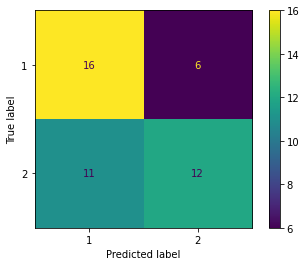

In [15]:
final_pred = grid.predict(scaled_X_test)
plot_confusion_matrix(grid, scaled_X_test, y_test)

In [16]:
print(precision_score(y_test, final_pred))
print(recall_score(y_test, final_pred))
print(f1_score(y_test, final_pred))

0.5925925925925926
0.7272727272727273
0.6530612244897959
